In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer

# Download stopwords 
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ramaalmrahleh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ramaalmrahleh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [99]:
data = pd.read_csv("Resume.csv")

In [100]:
data

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [102]:
# Verify the update
updated_resume = data.loc[data['ID'] == 19867922, 'Resume_str'].iloc[0]
print("Updated Resume for ID 17150707:\n", updated_resume)


Updated Resume for ID 17150707:
          HR GENERALIST           Experience     04/2015   to   Current       Provide general administrative support such as preparing correspondence, forms,
          and reports
          Scheduling and coordinating staff meetings, maintaining meeting minutes and
          notes
          Generate confidential ad hoc statistical reporting data and documentation
          regarding turnover, new hires, birthdays, anniversaries, benefits, and other
          relevant HR metrics
          Collect onboarding documentation to ensure benefit enrollment in a timely
          manner and follow up with employees to ensure their electronic enrollment has
          been processed in the HRIS portal
          Source documentation to process new hire setups in HR systems, process
          changes in pay rate, status, and initial/qualifying life event benefit changes
          Establish, maintain and audit employee data and files
          Manually process backgrou

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [103]:
# Remove the 'Resume_html' column
data.drop(columns=['Resume_html'], inplace=True)

In [104]:
data

,ID,Resume_str,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,33176873,HR DIRECTOR Summary Over 2...,HR
3,27018550,HR SPECIALIST Summary Dedica...,HR
4,17812897,HR MANAGER Skill Highlights ...,HR
...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


/var/folders/dm/y1vt4m8j43xbl9qk9zyfh22h0000gn/T/ipykernel_59661/3725897554.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Category'], palette='viridis')


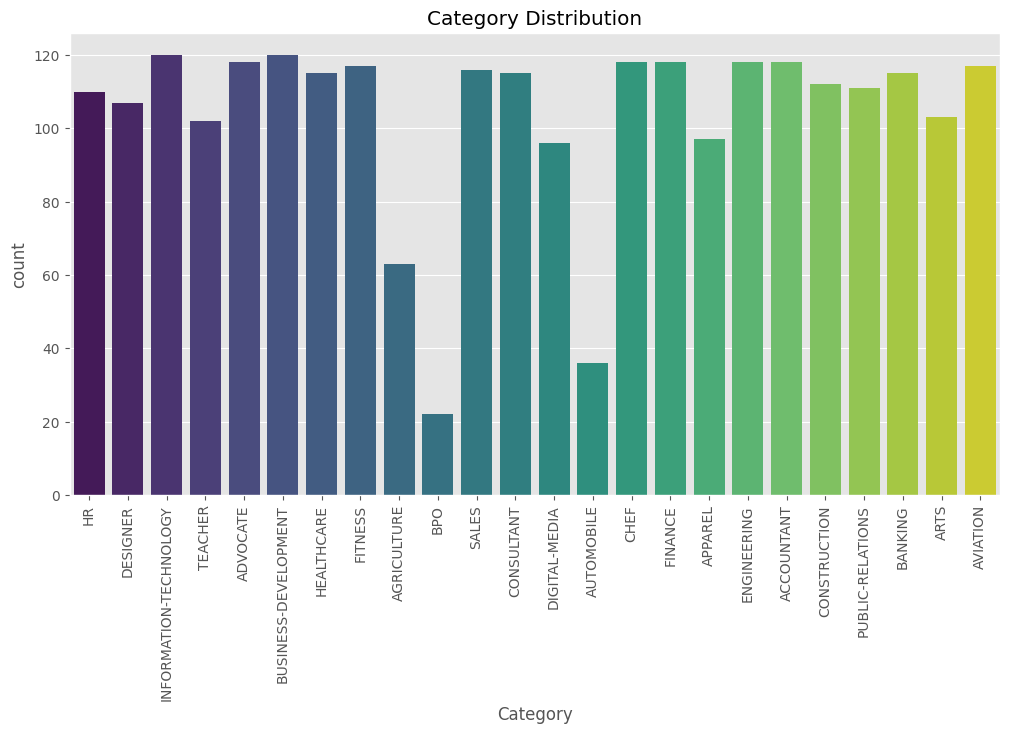

In [94]:
plt.figure(figsize=(12, 6))
sns.countplot(x=data['Category'], palette='viridis') 
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()


In [97]:
data['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [96]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase , try upper 
    text = text.lower()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [50]:
data['cleaned_resume'] = data['Resume_str'].apply(preprocess_text)
data

,ID,Resume_str,Category,cleaned_resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administratormarketing associate hr adminis...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist us hr operations summary versati...
2,33176873,HR DIRECTOR Summary Over 2...,HR,hr director summary 20 years experience recrui...
3,27018550,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR MANAGER Skill Highlights ...,HR,hr manager skill highlights hr skills hr depar...
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION,rank sgte5 non commissioned officer charge bri...
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION,government relations communications organizati...
2481,31605080,GEEK SQUAD AGENT Professional...,AVIATION,geek squad agent professional profile support ...
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION,program director office manager summary highly...


In [51]:
#data.drop(columns=['Resume_str'], inplace=True)

In [105]:
# Load the pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')


In [106]:
# Generate BERT embeddings for resumes
resume_embeddings = model.encode(data['Resume_str'].tolist(), show_progress_bar=True)

# Convert embeddings to a NumPy array (for efficient computation)
resume_embeddings = np.array(resume_embeddings)

#The embeddings are now stored as a 2D array where:
#Each row corresponds to a single resume.
#Each column corresponds to a dimension of the embedding space (e.g., 768 dimensions for BERT-base).

Batches:   0%|          | 0/78 [00:00<?, ?it/s]

In [107]:
resume_embeddings

array([[-0.04447836,  0.02122916,  0.00516216, ..., -0.02918888,
        -0.01593215,  0.02303096],
       [-0.05166395,  0.01624672,  0.00266194, ..., -0.07939675,
         0.02150689,  0.06587211],
       [-0.04784507,  0.01932192, -0.03659413, ..., -0.05162014,
        -0.02907958,  0.06904536],
       ...,
       [-0.09692761, -0.04854787,  0.03496129, ...,  0.01022121,
        -0.00914932, -0.06547123],
       [-0.0715894 , -0.08503081,  0.03720783, ..., -0.06783954,
        -0.00590126,  0.0110207 ],
       [-0.05464254,  0.04835892,  0.01896026, ..., -0.04076725,
        -0.03409773,  0.03269792]], dtype=float32)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          2484 non-null   int64 
 1   Resume_str  2484 non-null   object
 2   Category    2484 non-null   object
dtypes: int64(1), object(2)
memory usage: 58.3+ KB


In [55]:
job_description = "Looking for a software engineer with expertise in Python, machine learning, and data science."

cleaned_job_desc = preprocess_text(job_description)

# Generate BERT embedding 
job_desc_embedding = model.encode([cleaned_job_desc])


In [62]:
# cosine similarity
similarity_scores = cosine_similarity(job_desc_embedding, resume_embeddings)

# Top 2 most similar resumes
top_2_indices = similarity_scores[0].argsort()[-2:][::-1]

# Retrieve the top 2 resumes
recommended_resumes = data.iloc[top_2_indices].copy()  # Use `.copy()` to avoid warnings

# Retrieve the scores for the top 2 resumes
top_2_scores = similarity_scores[0][top_2_indices]

# Assign similarity scores explicitly using `.loc`
recommended_resumes.loc[:, 'similarity_score'] = top_2_scores

# Display the result
print(recommended_resumes[['ID', 'cleaned_resume', 'Category', 'similarity_score']])



            ID                                     cleaned_resume  \
1762  12011623  engineering quality technician career overview...   
1717  50328713  engineering intern skills c python matlab git ...   

         Category  similarity_score  
1762  ENGINEERING          0.526398  
1717  ENGINEERING          0.453897  


In [57]:
# Filter the resume by ID
resume_text = data.loc[data['ID'] == 12011623, 'cleaned_resume'].values[0]
# Print the cleaned resume
print("Cleaned Resume for ID 12011623:")
print(resume_text)


Cleaned Resume for ID 12011623:
engineering quality technician career overview highly experienced skilled graduate analytics degree good experience sas web scraping sql predictive modelling data visualization excellent ability identifying data requirements analysis data cleaning munging model building ensures organization uses effectively reach profit growth objectives comfortable data handling modeling coding appreciation makes sense business standpoint six years experience working researcher data analyst environmental science technology instructor experience sql data warehousing maintaining securing stabilizing data layers testing identify data product defects introduced system customer segmentation product positioning mapping conjoint analysis modelling design implement statistical predictive models cutting edge algorithms utilizing diverse sources data predict diversified experience engineering manufacturing retailing higher education data related companies fascinated learning cutt

In [109]:
job_description2 = """Job Summary:
We are looking for HR candidate - senior role at the HR department in Amman.
Qualified candidates will have experience at the senior level and effectively manage all processes relating to employee relations, compliance, staffing, training, and culture.
Education
• Bachelor's degree in Human Resources Management or a business-related subject.

Job Requirements:
• Good knowledge of employment regulations.
• Excellent knowledge of HR practices.
• Vast working knowledge of all HR departmental areas, including reward and recognition, welfare, learning, and development, as well as HR systems and budgets.
• Knowledge of Jordan, KSA, and UAE labor law. 
• The ability to develop and nurture relationships across departments.
• The confidence to provide sound professional advice.
• The ability to lead the development of effective employment policies.
• Excellent knowledge and understanding of regulations, accepted professional standards, policies, procedures, and legislation.
• The ability to analyze and review HR data to identify trends.
• Candidates should have high negotiation and strong persuasive skills with the customers.

Duties & responsibilities:
• Provide reports on all areas of HR, onboarding, payroll, learning and development, HR policy, best practices, and workforce development.
• Advise and strategize on developing effective employment policies across the company. 
• Provide professional leadership, support, and development to HR staff to increase knowledge, share best practices, and ensure that relevant professional standards are met.
• Ensure that the company complies with current regulations, accepted professional standards, policies and procedures, and legislation
• Manage the execution of the HR strategy and core areas of the HR department, including recruitment, employee relations, workforce administration, employee engagement, payroll, reward, and recognition, as well as maintaining and improving HR systems and management of the HR budget. 
• Drive the continuous improvement agenda with a focus on engagement & welfare activities, maximizing productivity, devolving HR responsibilities to line managers, and building leadership capability.
• Ensure managers are sufficiently skilled and enabled to access appropriate guidance and information to manage workforce issues.
Minimum Requirements:

• 5–7 years of experience in the HR role.
• A pro-active attitude and a passion for leading with integrity.
• Experience in managing a skilled team and making quick but rational decisions.
• Good time management skills and the ability to prioritize, problem-solve, and use your initiative.
• Fluent in English & Arabic is a must
Knowledge, Skills, Attitude:
• Self-disciplined
• Able to solve problems in a positive manner in short time
• Strong persuasive skills and ability to exercise influence beyond the direct authority
• Presentable and good general communication skills
• Able to work in a fast-paced environment.

Employment Type
• Full-time"""
# Preprocess the job description
cleaned_job_desc2 = preprocess_text(job_description2)

# Generate BERT embedding for the job description
job_desc_embedding2 = model.encode([cleaned_job_desc2])


In [111]:
# Compute cosine similarity
similarity_scores2 = cosine_similarity(job_desc_embedding2, resume_embeddings)

# Top 2 most similar resumes
top_2_indices2 = similarity_scores2[0].argsort()[-2:][::-1]

# Retrieve the top 2 resumes
recommended_resumes2 = data.iloc[top_2_indices2].copy()  # Use `.copy()` to avoid warnings

# Retrieve the scores for the top 2 resumes
top_2_scores2 = similarity_scores2[0][top_2_indices2]

# Assign similarity scores explicitly using `.loc`
recommended_resumes2.loc[:, 'similarity_score'] = top_2_scores2

# Display the result
print(recommended_resumes2[['ID', 'Resume_str', 'Category', 'similarity_score']])


            ID                                         Resume_str    Category  \
17    24184357           HR DIRECTOR           Summary    Huma...          HR   
1170  27726066           CONSULTANT           Summary    HR Pr...  CONSULTANT   

      similarity_score  
17            0.722440  
1170          0.712201  


In [112]:
updated_resume = data.loc[data['ID'] == 24184357, 'Resume_str'].iloc[0]
print("Updated Resume for ID 17150707:\n", updated_resume)

Updated Resume for ID 17150707:
          HR DIRECTOR           Summary    Human Resource Professional
Confident, Resourceful Human Resources professional, with academic background in human  resources management and hands-on experience hiring, training, orientating, and developing employees that currently serve in a one person role managing 63 employees for a fast growing organization.      Highlights          Analytical Skills		Good Interpersonal Skills		Organizational Skills		Communication Skills  Recruiting and Staffing	Performance Management 		Employee Relations		Selection/Recruiting  Employee Orientation	Training & Development		Policy & Procedure Writing	Detail Organization  Staff Supervision		Employee Records System		On-the-job Training		Job Analysis  Cold Calling		Internet Sourcing			Compensation			Labor Laws  Labor Policies		Equal Employment Opportunity	Interviewing			Discipline Issues  Social Networking	Recruitment Advertising		Campus Recruiting		OSHA Standards  Employee Griev

In [67]:
# Compute cosine similarity
similarity_scores = cosine_similarity(job_desc_embedding2, resume_embeddings)

# Extract resumes that meet the threshold
threshold = 0.85
matching_indices = [i for i, score in enumerate(similarity_scores[0]) if score > threshold]

# Retrieve the resumes that meet the threshold
matching_resumes = data.iloc[matching_indices]

# Retrieve the similarity scores for the matching resumes
matching_scores = similarity_scores[0][matching_indices]

# Add similarity scores to the matching resumes
matching_resumes = matching_resumes.copy()
matching_resumes['similarity_score'] = matching_scores

# Display the matching resumes with their similarity scores
print(matching_resumes[['ID', 'cleaned_resume', 'Category', 'similarity_score']])


           ID                                     cleaned_resume  Category  \
4    17812897  hr manager skill highlights hr skills hr depar...        HR   
7    15375009  hr manager professional summary senior hr prof...        HR   
8    11847784  hr specialist summary possess 15 years experie...        HR   
11   11480899  hr manager summary human resources manager pra...        HR   
12   23155093  hr manager summary obtain position offers many...        HR   
22   25676643  hr specialist summary human resources speciali...        HR   
24   87968870  hr generalist summary energetic bilingual huma...        HR   
30   49937469  hr assistant highlights interviewing expertise...        HR   
31   18316239  hr generalist professional profile responsible...        HR   
35   32947778  hr manager summary human resources professiona...        HR   
36   23914451  hr generalist summary human resource manager a...        HR   
40   41523474  hr executive summary dual specialization domai...

### modify on the data 

In [66]:
data

,ID,Category,cleaned_resume
0,16852973,HR,hr administratormarketing associate hr adminis...
1,22323967,HR,hr specialist us hr operations summary versati...
2,33176873,HR,hr director summary 20 years experience recrui...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...
...,...,...,...
2479,99416532,AVIATION,rank sgte5 non commissioned officer charge bri...
2480,24589765,AVIATION,government relations communications organizati...
2481,31605080,AVIATION,geek squad agent professional profile support ...
2482,21190805,AVIATION,program director office manager summary highly...


In [98]:
# Verify the update
updated_resume = data.loc[data['ID'] == 19867922, 'cleaned_resume'].iloc[0]
print("Updated Resume for ID 17150707:\n", updated_resume)


Updated Resume for ID 17150707:
 hr generalist experience 042015 current provide general administrative support preparing correspondence forms reports scheduling coordinating staff meetings maintaining meeting minutes notes generate confidential ad hoc statistical reporting data documentation regarding turnover new hires birthdays anniversaries benefits relevant hr metrics collect onboarding documentation ensure benefit enrollment timely manner follow employees ensure electronic enrollment processed hris portal source documentation process new hire setups hr systems process changes pay rate status initialqualifying life event benefit changes establish maintain audit employee data files manually process background checks entries employment verifications fullcycle hr related items onboarding departures assist maintenance updates organizational chart facilitate assist new hire orientation presentations maintain highest level confidentiality data security protect employee privacy related e

In [68]:
# Define the additional responsibilities to be added
additional_responsibilities = """
Provide reports on all areas of HR, onboarding, payroll, learning and development, HR policy, best practices, and workforce development.
Advise and strategize on developing effective employment policies across the company. 
Provide professional leadership, support, and development to HR staff to increase knowledge, share best practices, and ensure that relevant professional standards are met.
Ensure that the company complies with current regulations, accepted professional standards, policies and procedures, and legislation.
Manage the execution of the HR strategy and core areas of the HR department, including recruitment, employee relations, workforce administration, employee engagement, payroll, reward, and recognition, as well as maintaining and improving HR systems and management of the HR budget. 
Drive the continuous improvement agenda with a focus on engagement & welfare activities, maximizing productivity, devolving HR responsibilities to line managers, and building leadership capability.
Ensure managers are sufficiently skilled and enabled to access appropriate guidance and information to manage workforce issues.
"""

# Locate the row with ID 17150707 and update the 'cleaned_resume' field
data.loc[data['ID'] == 19867922, 'cleaned_resume'] = data.loc[data['ID'] == 19867922, 'cleaned_resume'].iloc[0] + additional_responsibilities

# Verify the update
updated_resume = data.loc[data['ID'] == 19867922, 'cleaned_resume'].iloc[0]
print("Updated Resume for ID 17150707:\n", updated_resume)


Updated Resume for ID 17150707:
 hr generalist experience 042015 current provide general administrative support preparing correspondence forms reports scheduling coordinating staff meetings maintaining meeting minutes notes generate confidential ad hoc statistical reporting data documentation regarding turnover new hires birthdays anniversaries benefits relevant hr metrics collect onboarding documentation ensure benefit enrollment timely manner follow employees ensure electronic enrollment processed hris portal source documentation process new hire setups hr systems process changes pay rate status initialqualifying life event benefit changes establish maintain audit employee data files manually process background checks entries employment verifications fullcycle hr related items onboarding departures assist maintenance updates organizational chart facilitate assist new hire orientation presentations maintain highest level confidentiality data security protect employee privacy related e

In [69]:
resume_text = data.loc[data['ID'] == 19867922, 'cleaned_resume'].values[0]
# Print the cleaned resume
print("Cleaned Resume for ID 19867922:")
print(resume_text)

Cleaned Resume for ID 19867922:
hr generalist experience 042015 current provide general administrative support preparing correspondence forms reports scheduling coordinating staff meetings maintaining meeting minutes notes generate confidential ad hoc statistical reporting data documentation regarding turnover new hires birthdays anniversaries benefits relevant hr metrics collect onboarding documentation ensure benefit enrollment timely manner follow employees ensure electronic enrollment processed hris portal source documentation process new hire setups hr systems process changes pay rate status initialqualifying life event benefit changes establish maintain audit employee data files manually process background checks entries employment verifications fullcycle hr related items onboarding departures assist maintenance updates organizational chart facilitate assist new hire orientation presentations maintain highest level confidentiality data security protect employee privacy related em

In [70]:
resume_embeddings2 = model.encode(data['cleaned_resume'].tolist(), show_progress_bar=True)
resume_embeddings2 = np.array(resume_embeddings2)


Batches:   0%|          | 0/78 [00:00<?, ?it/s]

In [71]:
# Compute cosine similarity
similarity_scores3 = cosine_similarity(job_desc_embedding2, resume_embeddings2)

# Extract resumes that meet the threshold
threshold = 0.85  
matching_indices3 = [i for i, score in enumerate(similarity_scores3[0]) if score > threshold]

# Retrieve the resumes that meet the threshold
matching_resumes3 = data.iloc[matching_indices3]

# Retrieve the similarity scores for the matching resumes
matching_scores3 = similarity_scores[0][matching_indices3]

# Add similarity scores to the matching resumes
matching_resumes3 = matching_resumes3.copy()
matching_resumes3['similarity_score'] = matching_scores3

# Display the matching resumes with their similarity scores
print(matching_resumes3[['ID', 'cleaned_resume', 'Category', 'similarity_score']])

           ID                                     cleaned_resume  Category  \
4    17812897  hr manager skill highlights hr skills hr depar...        HR   
7    15375009  hr manager professional summary senior hr prof...        HR   
8    11847784  hr specialist summary possess 15 years experie...        HR   
11   11480899  hr manager summary human resources manager pra...        HR   
12   23155093  hr manager summary obtain position offers many...        HR   
22   25676643  hr specialist summary human resources speciali...        HR   
24   87968870  hr generalist summary energetic bilingual huma...        HR   
30   49937469  hr assistant highlights interviewing expertise...        HR   
31   18316239  hr generalist professional profile responsible...        HR   
35   32947778  hr manager summary human resources professiona...        HR   
36   23914451  hr generalist summary human resource manager a...        HR   
40   41523474  hr executive summary dual specialization domai...